In [28]:
import tensorflow.compat.v1 as tf
from tensorflow import feature_column
from tensorflow.keras import layers
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

%matplotlib inline

In [59]:
#doginfo.csv파일 데이터를 pandas를 이용해 읽어옵니다.
dog_data=pd.read_csv("doginfo_mmy.csv")
dog_train=pd.read_csv("testDog.csv")
kindCd=pd.read_csv("kindCd.csv")

dog_data = dog_data.dropna(axis=0)
dog_train = dog_train.dropna(axis=0)
kindCd_data = kindCd.dropna(axis=0)
dog_train

,kindNum,neuterYn,sexCd,weight,noticeDays,age2,processState
0,128.0,N,M,0.8,10,0,1
1,114.0,N,M,5.0,10,1,0
2,12.0,N,F,5.0,10,13,0
3,17.0,N,M,5.0,10,3,0
4,114.0,N,M,15.0,10,7,0
...,...,...,...,...,...,...,...
606,77.0,Y,M,6.4,11,10,0
607,114.0,U,F,1.7,11,0,0
608,114.0,U,F,1.7,11,0,1
609,72.0,U,F,3.6,11,2,1


In [60]:
kindCd = np.array(kindCd_data, dtype = np.float64)
kindCd_train=np.array(kindCd_data, dtype=np.float64)

kindCd = kindCd.reshape(177)
kindCd_train=kindCd_train.reshape(177)
print(kindCd)
print(kindCd.shape)

[ 54.  56.  55. 118. 115.  37.  81. 204.  83.  82.  38.  39.  40.  43.
  42. 153.  41. 120. 155.  69.  71. 142.  93. 167.  70. 166.  94. 121.
 152.  73. 146.  72. 159.  76.  75.  79.  78.  77.  74.  80. 114. 133.
  12.  17.  15. 164. 157. 148.  16.  20.  21.  22.  24. 208.  23.  26.
  27. 169.  25.  19.  13.  18.  14. 162.  85.  96.  95.   1.  34. 104.
  31.  99. 122. 123.  97. 132. 105. 154. 124. 100. 103. 151. 139. 101.
 102.  98. 136. 202. 160. 203.   8. 131.   9. 119. 150. 210.  57.  58.
  59.   6.   4.   7.   5. 143.  11.  10. 137.  84. 163. 112. 113. 149.
 211. 110. 205. 108. 109.  60.  46.  47.  44.  45.  53.  62.  61.  52.
 165.  51. 156. 129.  67.  35.  33.  32. 158. 144.  30.  29.  64. 207.
  28.   2.  68. 125. 141. 145.  36.  66.  65.  63. 140. 107. 106. 209.
  86.  88.  90.  87. 138.  89. 126. 127. 128.  91.   3. 161.  50. 168.
  49. 147.  92.  48. 135. 206. 130. 134. 111.]
(177,)


In [61]:
# kindNum을 원핫 인코딩
kindCd = pd.concat((pd.get_dummies(dog_data.kindNum, columns=kindCd), pd.DataFrame(columns=kindCd))).fillna(0)


# 학습데이터에서 kindNum 열을 삭제한 후, 원핫 인코딩된 kindCd를 붙임
dog_data.drop(['kindNum'], axis='columns', inplace=True)
dog_data = pd.concat([dog_data, kindCd], axis=1)


# kindNum을 원핫 인코딩
kindCd_train = pd.concat((pd.get_dummies(dog_train.kindNum, columns=kindCd_train), pd.DataFrame(columns=kindCd_train))).fillna(0)

# 테스트데이터에서 kindNum 열을 삭제한 후, 원핫 인코딩된 kindCd를 붙임
dog_train.drop(['kindNum'], axis='columns', inplace=True)
dog_train = pd.concat([dog_train, kindCd_train], axis=1)


In [62]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        data = data.drop(column, axis = 1)
    return data

In [63]:
dummy_columns = ["neuterYn", "sexCd"]
data = dummy_data(dog_data, dummy_columns)
train_data = dummy_data(dog_train, dummy_columns)

print(data)

data = np.array(data, dtype = np.float64)
# train_data = np.array(train_data, dtype = np.float64)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), '훈련 샘플')
print(len(val), '검증 샘플')
print(len(test), '테스트 샘플')

      weight  noticeDays  age2  processState  1.0  2.0  3.0  4.0  5.0  6.0  \
0       7.46          10    12             0    0    0    0    0    0    0   
1       7.00          14     1             1    0    0    0    0    0    0   
2       4.50          11     2             0    0    0    0    0    0    0   
3      10.00           8     1             0    0    0    0    0    0    0   
4       6.00           8     4             0    0    0    0    0    0    0   
...      ...         ...   ...           ...  ...  ...  ...  ...  ...  ...   
1994    0.98          10     0             1    0    0    0    0    0    0   
1995    1.20          10     0             1    0    0    0    0    0    0   
1996   50.00          10     3             1    0    0    0    0    0    0   
1997    9.00          10     3             0    0    0    0    0    0    0   
1998   12.50          10     3             0    0    0    0    0    0    0   

      ...  208.0  209.0  210.0  211.0  neuterYn_N  neuterYn_U  

In [64]:
a = train[:, :3]
b = train[:, 4:]

#numpy 배열에서 데이터 변화요인(kindCd, neuterYn, sexCd, weight, noticeDays, age2)으로 사용할 데이터를 뽑아냅니다.
xData = np.concatenate([a, b], axis = 1)

a=test[:, :3]
b=test[:, 4:]
testX=np.concatenate([a, b], axis = 1)

a=val[:, :3]
b=val[:, 4:]
valX=np.concatenate([a, b], axis = 1)


In [65]:
#numpy배열에서 결과(입양여부)로 사용할 데이터를 뽑아냅니다.
yData=train[:,[3]]
testY=test[:,[3]]
valY=val[:,[3]]

print(yData)
type(yData)
yData.dtype

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


dtype('float64')

Train on 1276 samples, validate on 320 samples
Epoch 1/50
1276/1276 [==============================] - 4s 3ms/sample - loss: 0.9332 - acc: 0.5815 - binary_crossentropy: 0.6742 - val_loss: 0.7814 - val_acc: 0.6344 - val_binary_crossentropy: 0.6746
Epoch 2/50
1276/1276 [==============================] - 1s 1ms/sample - loss: 0.7322 - acc: 0.6293 - binary_crossentropy: 0.6561 - val_loss: 0.7361 - val_acc: 0.5906 - val_binary_crossentropy: 0.6793
Epoch 3/50
1276/1276 [==============================] - 1s 1ms/sample - loss: 0.6966 - acc: 0.6403 - binary_crossentropy: 0.6468 - val_loss: 0.7085 - val_acc: 0.6281 - val_binary_crossentropy: 0.6637
Epoch 4/50
1276/1276 [==============================] - 1s 1ms/sample - loss: 0.6802 - acc: 0.6528 - binary_crossentropy: 0.6378 - val_loss: 0.7221 - val_acc: 0.6000 - val_binary_crossentropy: 0.6806
Epoch 5/50
1276/1276 [==============================] - 2s 2ms/sample - loss: 0.6686 - acc: 0.6567 - binary_crossentropy: 0.6288 - val_loss: 0.7020 - val

1276/1276 [==============================] - 1s 1ms/sample - loss: 0.6191 - acc: 0.6834 - binary_crossentropy: 0.5898 - val_loss: 0.6327 - val_acc: 0.6812 - val_binary_crossentropy: 0.6035
Epoch 42/50
1276/1276 [==============================] - 2s 1ms/sample - loss: 0.6180 - acc: 0.6873 - binary_crossentropy: 0.5887 - val_loss: 0.6323 - val_acc: 0.6687 - val_binary_crossentropy: 0.6027
Epoch 43/50
1276/1276 [==============================] - 1s 1ms/sample - loss: 0.6175 - acc: 0.6810 - binary_crossentropy: 0.5880 - val_loss: 0.6421 - val_acc: 0.6687 - val_binary_crossentropy: 0.6125
Epoch 44/50
1276/1276 [==============================] - 2s 1ms/sample - loss: 0.6176 - acc: 0.6873 - binary_crossentropy: 0.5877 - val_loss: 0.6355 - val_acc: 0.6562 - val_binary_crossentropy: 0.6063
Epoch 45/50
1276/1276 [==============================] - 1s 1ms/sample - loss: 0.6169 - acc: 0.6826 - binary_crossentropy: 0.5874 - val_loss: 0.6425 - val_acc: 0.6469 - val_binary_crossentropy: 0.6134
Epoch 4

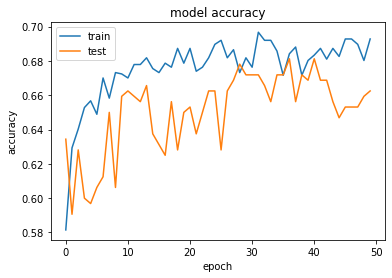

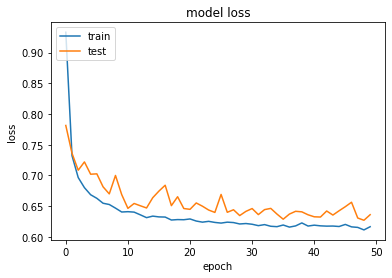

In [66]:
# L2규제만 4개: 0.6907 3개op없을떄: 0.72 4개op없을때: 0.64, 
l2_model = keras.models.Sequential([
#     keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01),
#                        activation=tf.nn.relu, input_shape=(186,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01),
                       activation=tf.nn.relu, input_shape=(186,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01),
                       activation=tf.nn.relu, input_shape=(186,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
# sgd=optimizers.SGD(lr=0.001)
# adam=optimizers.Adam(lr=0.01)
# RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)#0.51
RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)#0.70
Adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)#0.5764
Adadelta = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)#0.6029
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)#0.68
Nadam = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)#0.71

l2_model.compile(optimizer='Nadam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(xData, yData,
                                epochs=50,
                                batch_size=5,
                                validation_data=(valX, valY),
                                verbose=1)

loss_and_metric = l2_model.evaluate(testX, testY, batch_size=10, verbose=0)
print("train, loss and metric: {}".format(loss_and_metric))

## summarize history for accuracy
plt.plot(l2_model_history.history['acc'])
plt.plot(l2_model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
## summarize history for loss
plt.plot(l2_model_history.history['loss'])
plt.plot(l2_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

l2_model.save('l2_model_Nadam')

# l2_model.fit(xData, yData,epochs=100,batch_size=64,validation_data=(xData, yData),verbose=1)
# loss_and_metric = l2_model.evaluate(testX, testY, batch_size=10, verbose=0)
# print("train, loss and metric: {}".format(loss_and_metric))

# l2_model.summary()

In [20]:
# 드롭아웃만

# dpt_model = keras.models.Sequential([
#     keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(186,)),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(16, activation=tf.nn.relu),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# sgd=optimizers.SGD(lr=0.01)
# adam=optimizers.Adam(lr=0.01)
# # l2_model.compile(optimizer='sgd',
# #                  loss='binary_crossentropy',
# #                  metrics=['accuracy', 'binary_crossentropy'])


# dpt_model.compile(optimizer='adam',
#                   loss='binary_crossentropy',
#                   metrics=['accuracy','binary_crossentropy'])

# dpt_model_history = dpt_model.fit(xData, yData,
#                                   epochs=100,
#                                   batch_size=10,
#                                   validation_data=(testX, testY),
#                                   verbose=1)

# loss_and_metric = l2_model.evaluate(testX, testY, batch_size=10, verbose=0)
# print("train, loss and metric: {}".format(loss_and_metric))

Train on 1995 samples, validate on 610 samples
Epoch 1/100
1995/1995 [==============================] - 2s 839us/sample - loss: 0.9914 - acc: 0.5153 - binary_crossentropy: 0.7033 - val_loss: 0.9596 - val_acc: 0.5738 - val_binary_crossentropy: 0.6831
Epoch 2/100
1995/1995 [==============================] - 1s 359us/sample - loss: 0.9540 - acc: 0.5439 - binary_crossentropy: 0.6882 - val_loss: 0.9391 - val_acc: 0.5639 - val_binary_crossentropy: 0.6840
Epoch 3/100
1995/1995 [==============================] - 1s 427us/sample - loss: 0.9328 - acc: 0.5589 - binary_crossentropy: 0.6875 - val_loss: 0.9217 - val_acc: 0.5279 - val_binary_crossentropy: 0.6862
Epoch 4/100
1995/1995 [==============================] - 1s 374us/sample - loss: 0.9097 - acc: 0.5489 - binary_crossentropy: 0.6833 - val_loss: 0.9027 - val_acc: 0.5279 - val_binary_crossentropy: 0.6852
Epoch 5/100
1995/1995 [==============================] - 1s 369us/sample - loss: 0.8931 - acc: 0.5584 - binary_crossentropy: 0.6840 - val_los

Epoch 41/100
1995/1995 [==============================] - 1s 259us/sample - loss: 0.6731 - acc: 0.6256 - binary_crossentropy: 0.6504 - val_loss: 0.6744 - val_acc: 0.6115 - val_binary_crossentropy: 0.6521
Epoch 42/100
1995/1995 [==============================] - 1s 380us/sample - loss: 0.6710 - acc: 0.6120 - binary_crossentropy: 0.6489 - val_loss: 0.6739 - val_acc: 0.6180 - val_binary_crossentropy: 0.6522
Epoch 43/100
1995/1995 [==============================] - 1s 401us/sample - loss: 0.6708 - acc: 0.6211 - binary_crossentropy: 0.6493 - val_loss: 0.6781 - val_acc: 0.5967 - val_binary_crossentropy: 0.6569
Epoch 44/100
1995/1995 [==============================] - 1s 378us/sample - loss: 0.6755 - acc: 0.6020 - binary_crossentropy: 0.6545 - val_loss: 0.6705 - val_acc: 0.6098 - val_binary_crossentropy: 0.6498
Epoch 45/100
1995/1995 [==============================] - 1s 373us/sample - loss: 0.6633 - acc: 0.6336 - binary_crossentropy: 0.6428 - val_loss: 0.6782 - val_acc: 0.6016 - val_binary_c

1995/1995 [==============================] - 1s 387us/sample - loss: 0.6638 - acc: 0.6221 - binary_crossentropy: 0.6479 - val_loss: 0.6726 - val_acc: 0.6115 - val_binary_crossentropy: 0.6568
Epoch 82/100
1995/1995 [==============================] - 1s 376us/sample - loss: 0.6605 - acc: 0.6331 - binary_crossentropy: 0.6448 - val_loss: 0.6577 - val_acc: 0.6197 - val_binary_crossentropy: 0.6418
Epoch 83/100
1995/1995 [==============================] - 1s 367us/sample - loss: 0.6608 - acc: 0.6271 - binary_crossentropy: 0.6449 - val_loss: 0.6692 - val_acc: 0.6262 - val_binary_crossentropy: 0.6534
Epoch 84/100
1995/1995 [==============================] - 1s 435us/sample - loss: 0.6638 - acc: 0.6276 - binary_crossentropy: 0.6478 - val_loss: 0.7031 - val_acc: 0.5902 - val_binary_crossentropy: 0.6870
Epoch 85/100
1995/1995 [==============================] - 1s 492us/sample - loss: 0.6648 - acc: 0.6281 - binary_crossentropy: 0.6487 - val_loss: 0.6775 - val_acc: 0.5967 - val_binary_crossentropy: 

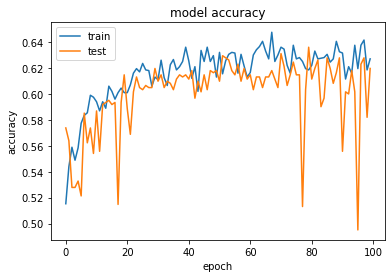

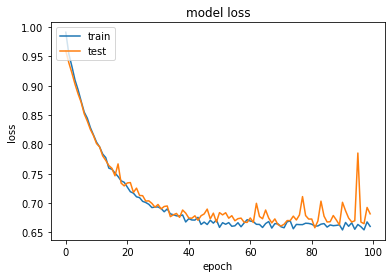

In [24]:
# L2규제, 드롭아웃 모두 적용

# l2_model = keras.models.Sequential([
#     keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01),
#                        activation=tf.nn.relu, input_shape=(186,)),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01),
#                        activation=tf.nn.relu),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01),
#                        activation=tf.nn.relu, input_shape=(186,)),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(1, activation=tf.nn.sigmoid)
# ]) 
# RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# adam=optimizers.Adam(lr=0.01)
# sgd=optimizers.SGD(lr=0.01)
# l2_model.compile(optimizer=sgd,
#                  loss='binary_crossentropy',
#                  metrics=['accuracy', 'binary_crossentropy'])

# l2_model_history = l2_model.fit(xData, yData,
#                                 epochs=100,
#                                 batch_size=10,
#                                 validation_data=(testX, testY),
#                                 verbose=1)

# loss_and_metric = l2_model.evaluate(testX, testY, batch_size=10, verbose=0)
# print("train, loss and metric: {}".format(loss_and_metric))

# ## summarize history for accuracy
# plt.plot(l2_model_history.history['acc'])
# plt.plot(l2_model_history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# ## summarize history for loss
# plt.plot(l2_model_history.history['loss'])
# plt.plot(l2_model_history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [15]:
for i in range(len(train_data)):
    new_x=train_data[i, :].reshape(1,186)
    print('입양 확률 : %8.4f%%' % (l2_model.predict(new_x)*100))
l2_model.save('l2_model')

입양 확률 :  94.2203%
입양 확률 :  36.7390%
입양 확률 :  35.8996%
입양 확률 :  78.0932%
입양 확률 :  21.0893%
입양 확률 :  21.0893%
입양 확률 :  91.3862%
입양 확률 :  78.4416%
입양 확률 :  89.5666%
입양 확률 :  84.8468%
입양 확률 :  72.6395%
입양 확률 :  85.3167%
입양 확률 :  55.5937%
입양 확률 :  49.5257%
입양 확률 :  51.3644%
입양 확률 :  28.9706%
입양 확률 :  44.0449%
입양 확률 :  37.9210%
입양 확률 :  83.8701%
입양 확률 :  23.1563%
입양 확률 :  64.8517%
입양 확률 :  64.8517%
입양 확률 :  53.8228%
입양 확률 :  46.9142%
입양 확률 :  71.4867%
입양 확률 :  58.0059%
입양 확률 :  54.1604%
입양 확률 :  57.8769%
입양 확률 :  41.1052%
입양 확률 :  54.8027%
입양 확률 :  56.1087%
입양 확률 :  41.1052%
입양 확률 :  40.0840%
입양 확률 :  37.2096%
입양 확률 :  90.8167%
입양 확률 :  88.6520%
입양 확률 :  19.2490%
입양 확률 :  69.2019%
입양 확률 :  76.6373%
입양 확률 :  28.4616%
입양 확률 :  26.2082%
입양 확률 :  37.8162%
입양 확률 :  49.3927%
입양 확률 :  31.0500%
입양 확률 :  32.5425%
입양 확률 :  45.5628%
입양 확률 :  49.3927%
입양 확률 :  51.3507%
입양 확률 :  36.3324%
입양 확률 :  45.9654%
입양 확률 :  29.5362%
입양 확률 :  29.1457%
입양 확률 :  55.1988%
입양 확률 :  52.2923%
입양 확률 :  54.0260%
입양 확률 :  5

입양 확률 :  28.6237%
입양 확률 :  93.3353%
입양 확률 :  32.6441%
입양 확률 :  37.7122%
입양 확률 :  67.2223%
입양 확률 :  23.0380%
입양 확률 :  70.3892%
입양 확률 :  77.7126%
입양 확률 :  55.1501%
입양 확률 :  57.7917%
입양 확률 :  67.0752%
입양 확률 :  32.6870%
입양 확률 :  88.6794%
입양 확률 :  50.1714%
입양 확률 :  34.4334%
입양 확률 :  30.2486%
입양 확률 :  57.1593%
입양 확률 :  53.8719%
입양 확률 :  71.0483%
입양 확률 :  66.8481%
입양 확률 :  83.2895%
입양 확률 :  59.9851%
입양 확률 :  87.3223%
입양 확률 :  94.8906%
입양 확률 :  53.2306%
입양 확률 :  41.5467%
입양 확률 :  41.7502%
입양 확률 :  26.5065%
입양 확률 :  29.7671%
입양 확률 :  96.1752%
입양 확률 :  44.4502%
입양 확률 :  92.8657%
입양 확률 :  39.4909%
입양 확률 :  83.0424%
입양 확률 :  91.3181%
입양 확률 :  86.7357%
입양 확률 :  54.5117%
입양 확률 :  23.3083%
입양 확률 :  24.4934%
입양 확률 :  90.5356%
입양 확률 :  65.2899%
입양 확률 :  32.4555%
입양 확률 :  20.8052%
입양 확률 :  31.4452%
입양 확률 :  50.1362%
입양 확률 :  52.8710%
입양 확률 :  53.2796%
입양 확률 :  53.4489%
입양 확률 :  85.6347%
입양 확률 :  89.7685%
입양 확률 :  30.2853%
입양 확률 :  57.8625%
입양 확률 :  33.0917%
입양 확률 :  52.3523%
입양 확률 :  90.5433%
입양 확률 :  9